In [1]:
# 数据探索与分析
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path

plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False
sns.set_style("whitegrid")

PROJECT_PATH = "D:/VSCodeProjects/PythonCourse"
DATA_PATH = os.path.join(PROJECT_PATH, "data/raw")
print("项目数据路径:", DATA_PATH)

项目数据路径: D:/VSCodeProjects/PythonCourse\data/raw


In [2]:
# 1. 读取所有CSV文件
def load_movie_data(data_path):
    """加载Movie Lens数据集"""
    movies = pd.read_csv(os.path.join(data_path, 'movies.csv'))
    ratings = pd.read_csv(os.path.join(data_path, 'ratings.csv'))
    links = pd.read_csv(os.path.join(data_path, 'links.csv'))
    tags = pd.read_csv(os.path.join(data_path, 'tags.csv'))
    
    return movies, ratings, links, tags

# 加载数据
movies, ratings, links, tags = load_movie_data(DATA_PATH)

print("数据加载完成!")
print("=" * 50)

数据加载完成!


In [3]:
def explore_basic_info(movies, ratings, links, tags):
    """探索数据集基本信息并保存到文件"""
    
    # 保存完整信息到文件
    with open('data_exploration.txt', 'w', encoding='utf-8') as f:
        f.write("📊 数据集基本信息:\n")
        f.write(f"电影数据: {movies.shape}\n")
        f.write(f"评分数据: {ratings.shape}\n")
        f.write(f"链接数据: {links.shape}\n")
        f.write(f"标签数据: {tags.shape}\n\n")
        
        f.write("🎬 电影数据预览:\n")
        f.write(movies.head(20).to_string())
        f.write("\n\n电影数据信息:\n")
        
        # 捕获info输出
        import io
        buffer = io.StringIO()
        movies.info(buf=buffer)
        f.write(buffer.getvalue())
        
        f.write("\n\n电影数据描述:\n")
        f.write(movies.describe(include='all').to_string())
    
    print("完整信息已保存到 data_exploration.txt 文件中")
    
    # 控制台显示精简信息
    print("📊 数据集基本信息:")
    print(f"电影数据: {movies.shape}")
    print(f"评分数据: {ratings.shape}")
    print(f"链接数据: {links.shape}")
    print(f"标签数据: {tags.shape}")
    
    print("\n🎬 电影数据前5行:")
    print(movies.head())
    
    print("\n⭐ 评分数据前5行:")
    print(ratings.head())

explore_basic_info(movies, ratings, links, tags)

完整信息已保存到 data_exploration.txt 文件中
📊 数据集基本信息:
电影数据: (9742, 3)
评分数据: (100836, 4)
链接数据: (9742, 3)
标签数据: (3683, 4)

🎬 电影数据前5行:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  

⭐ 评分数据前5行:
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


评分数据详细分析:
评分时间范围: 1996-03-29 18:36:55 到 2018-09-24 14:27:30
唯一用户数: 610
唯一电影数: 9724


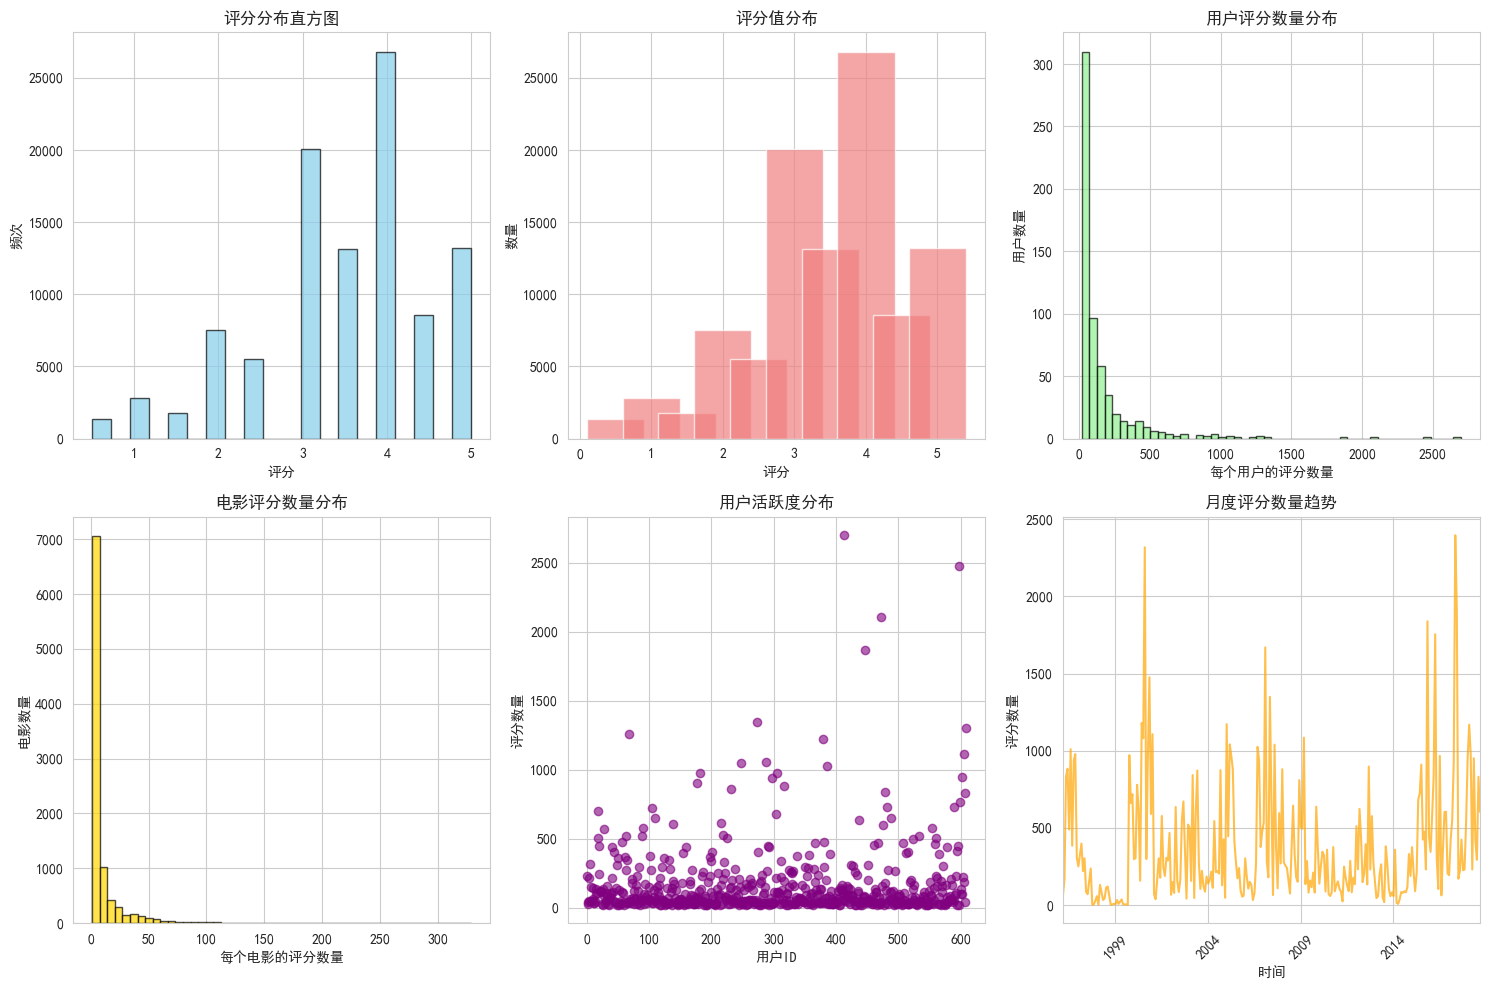

平均每个用户评分数量: 165.30
平均每个电影评分数量: 10.37
最活跃用户评分数量: 2698
最受欢迎电影评分数量: 329


In [4]:
# 3. 评分数据深入分析
def analyze_ratings(ratings):
    # 分析评分数据
    plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'DejaVu Sans']
    plt.rcParams['axes.unicode_minus'] = False
    
    print("评分数据详细分析:")
    print(f"评分时间范围: {pd.to_datetime(ratings['timestamp'], unit='s').min()} 到 {pd.to_datetime(ratings['timestamp'], unit='s').max()}")
    print(f"唯一用户数: {ratings['userId'].nunique()}")
    print(f"唯一电影数: {ratings['movieId'].nunique()}")
    
    # 评分分布
    plt.figure(figsize=(15, 10))
    
    plt.subplot(2, 3, 1)
    ratings['rating'].hist(bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    plt.title('评分分布直方图')
    plt.xlabel('评分')
    plt.ylabel('频次')
    
    plt.subplot(2, 3, 2)
    rating_counts = ratings['rating'].value_counts().sort_index()
    plt.bar(rating_counts.index, rating_counts.values, color='lightcoral', alpha=0.7)
    plt.title('评分值分布')
    plt.xlabel('评分')
    plt.ylabel('数量')
    
    plt.subplot(2, 3, 3)
    user_rating_counts = ratings['userId'].value_counts()
    user_rating_counts.hist(bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
    plt.title('用户评分数量分布')
    plt.xlabel('每个用户的评分数量')
    plt.ylabel('用户数量')
    
    plt.subplot(2, 3, 4)
    movie_rating_counts = ratings['movieId'].value_counts()
    movie_rating_counts.hist(bins=50, alpha=0.7, color='gold', edgecolor='black')
    plt.title('电影评分数量分布')
    plt.xlabel('每个电影的评分数量')
    plt.ylabel('电影数量')
    
    plt.subplot(2, 3, 5)
    # 用户活跃度分析
    user_activity = ratings.groupby('userId').size()
    plt.scatter(range(len(user_activity)), user_activity.values, alpha=0.6, color='purple')
    plt.title('用户活跃度分布')
    plt.xlabel('用户ID')
    plt.ylabel('评分数量')
    
    plt.subplot(2, 3, 6)
    # 时间序列分析
    ratings['datetime'] = pd.to_datetime(ratings['timestamp'], unit='s')
    ratings['year_month'] = ratings['datetime'].dt.to_period('M')
    monthly_ratings = ratings.groupby('year_month').size()
    monthly_ratings.plot(alpha=0.7, color='orange')
    plt.title('月度评分数量趋势')
    plt.xlabel('时间')
    plt.ylabel('评分数量')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # 打印统计信息
    print(f"平均每个用户评分数量: {user_rating_counts.mean():.2f}")
    print(f"平均每个电影评分数量: {movie_rating_counts.mean():.2f}")
    print(f"最活跃用户评分数量: {user_rating_counts.max()}")
    print(f"最受欢迎电影评分数量: {movie_rating_counts.max()}")

analyze_ratings(ratings)

电影数据详细分析:


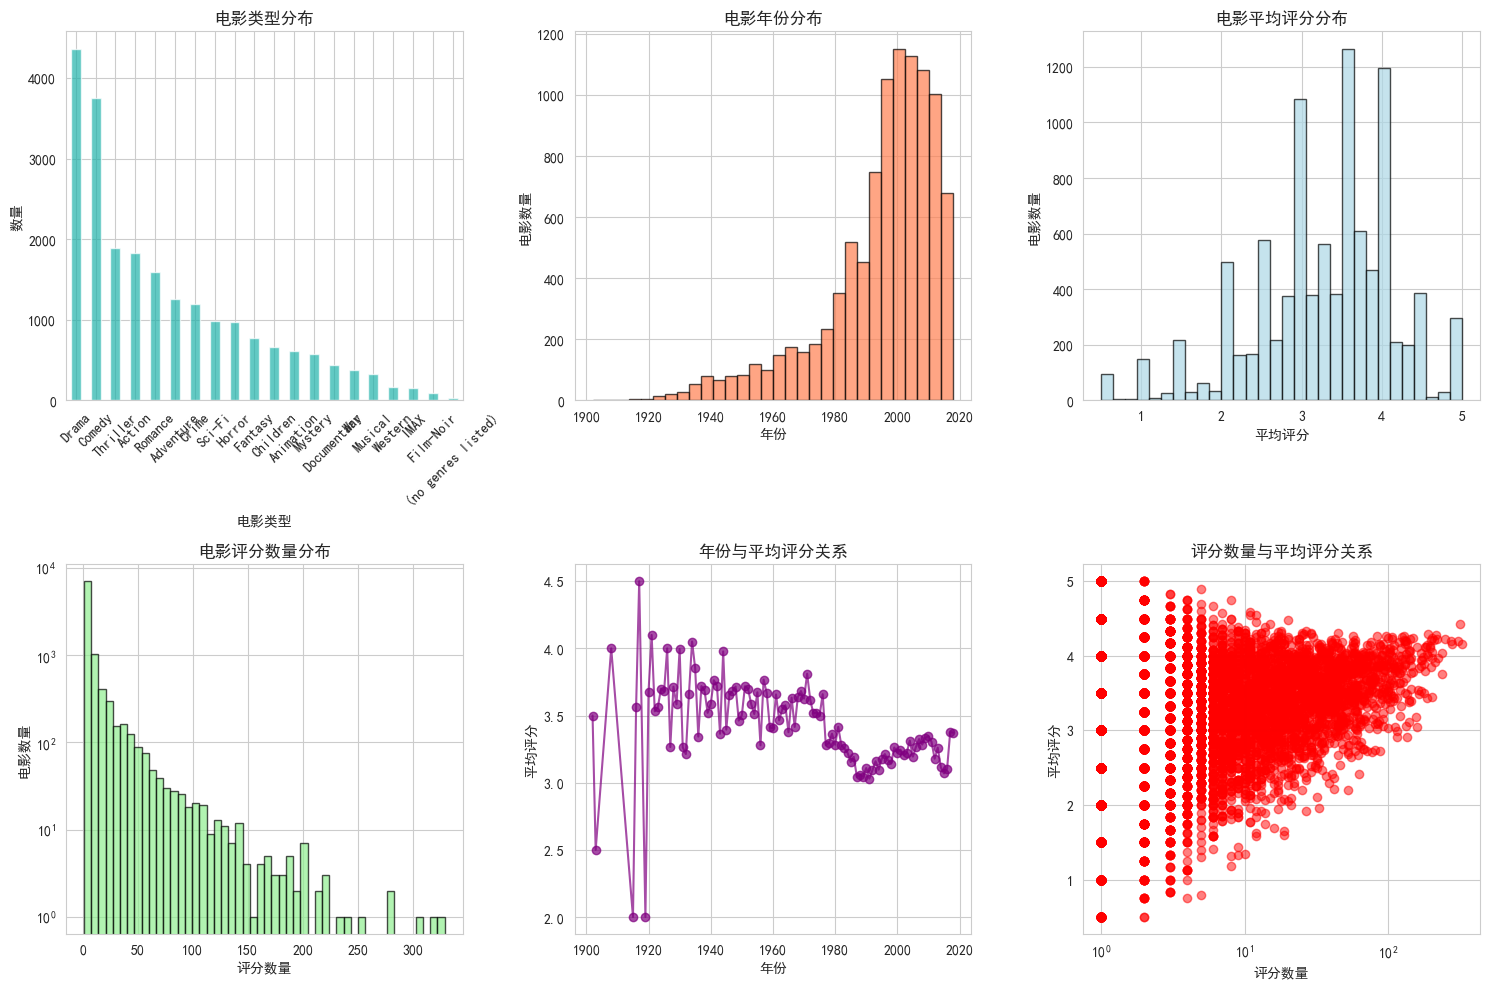

电影数据年份范围: 1902.0 - 2018.0
包含最多电影的类型: Drama (4361部)
平均每部电影评分数量: 10.37
所有电影平均评分: 3.26


In [5]:
# 4. 电影数据深入分析
def analyze_movies(movies, ratings):
    # 分析电影数据
    print("电影数据详细分析:")
    # 电影类型分析
    movies['genres_list'] = movies['genres'].str.split('|')
    all_genres = [genre for genres in movies['genres_list'].dropna() for genre in genres]
    genre_counts = pd.Series(all_genres).value_counts()
    # 从标题中提取年份
    movies['year'] = movies['title'].str.extract(r'\((\d{4})\)')
    movies['year'] = pd.to_numeric(movies['year'], errors='coerce')
    
    plt.figure(figsize=(15, 10))
    
    # 电影类型分布
    plt.subplot(2, 3, 1)
    genre_counts.plot(kind='bar', color='lightseagreen', alpha=0.7)
    plt.title('电影类型分布')
    plt.xlabel('电影类型')
    plt.ylabel('数量')
    plt.xticks(rotation=45)
    
    # 电影年份分布
    plt.subplot(2, 3, 2)
    movies['year'].hist(bins=30, alpha=0.7, color='coral', edgecolor='black')
    plt.title('电影年份分布')
    plt.xlabel('年份')
    plt.ylabel('电影数量')
    
    # 合并评分数据计算平均评分
    movie_avg_ratings = ratings.groupby('movieId')['rating'].agg(['mean', 'count']).reset_index()
    movie_data = movies.merge(movie_avg_ratings, on='movieId', how='left')
    
    # 平均评分分布
    plt.subplot(2, 3, 3)
    movie_data['mean'].hist(bins=30, alpha=0.7, color='lightblue', edgecolor='black')
    plt.title('电影平均评分分布')
    plt.xlabel('平均评分')
    plt.ylabel('电影数量')
    
    # 评分数量分布
    plt.subplot(2, 3, 4)
    movie_data['count'].hist(bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
    plt.title('电影评分数量分布')
    plt.xlabel('评分数量')
    plt.ylabel('电影数量')
    plt.yscale('log')
    
    # 年份与评分的关系
    plt.subplot(2, 3, 5)
    yearly_ratings = movie_data.groupby('year')['mean'].mean()
    plt.plot(yearly_ratings.index, yearly_ratings.values, marker='o', alpha=0.7, color='purple')
    plt.title('年份与平均评分关系')
    plt.xlabel('年份')
    plt.ylabel('平均评分')
    
    # 评分数量与平均评分的关系
    plt.subplot(2, 3, 6)
    plt.scatter(movie_data['count'], movie_data['mean'], alpha=0.5, color='red')
    plt.title('评分数量与平均评分关系')
    plt.xlabel('评分数量')
    plt.ylabel('平均评分')
    plt.xscale('log')
    
    plt.tight_layout()
    plt.show()
    
    # 打印电影数据统计
    print(f"电影数据年份范围: {movies['year'].min()} - {movies['year'].max()}")
    print(f"包含最多电影的类型: {genre_counts.index[0]} ({genre_counts.iloc[0]}部)")
    print(f"平均每部电影评分数量: {movie_data['count'].mean():.2f}")
    print(f"所有电影平均评分: {movie_data['mean'].mean():.2f}")

analyze_movies(movies, ratings)

不同类型电影评分统计:
                     mean    std  count
genres_list                            
Documentary         3.782  0.711    438
Film-Noir           3.670  0.657     85
War                 3.572  0.784    381
Animation           3.497  0.902    610
Drama               3.421  0.781   4349
Western             3.383  0.728    167
(no genres listed)  3.371  1.281     34
Romance             3.365  0.772   1591
Mystery             3.330  0.806    573
IMAX                3.312  0.644    158
Crime               3.302  0.819   1196
Musical             3.296  0.805    333
Fantasy             3.219  0.877    778
Adventure           3.215  0.792   1262
Comedy              3.182  0.884   3753
Thriller            3.156  0.801   1889
Children            3.108  0.908    664
Sci-Fi              3.103  0.898    980
Action              3.094  0.838   1828
Horror              2.919  0.992    977


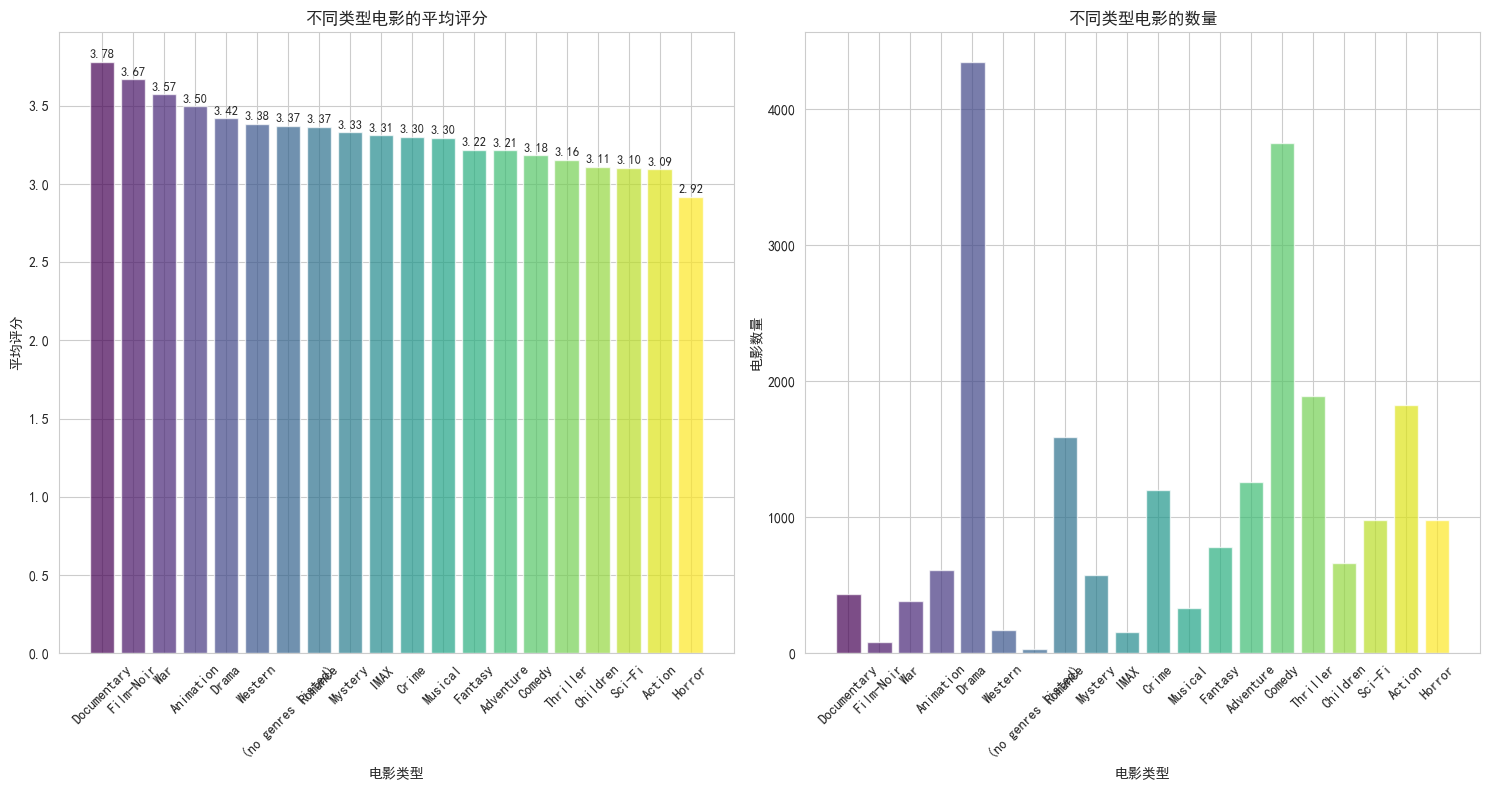

In [6]:
# 5. 电影类型与评分的关系分析
def analyze_genre_ratings(movies, ratings):
    # 分析不同类型电影的评分特征
    
    # 为每个电影类型创建分析
    movies_exploded = movies.explode('genres_list')
    movie_ratings = ratings.groupby('movieId')['rating'].mean().reset_index()
    genre_movie_data = movies_exploded.merge(movie_ratings, on='movieId', how='inner')
    
    # 按类型分组分析
    genre_stats = genre_movie_data.groupby('genres_list')['rating'].agg(['mean', 'std', 'count']).round(3)
    genre_stats = genre_stats.sort_values('mean', ascending=False)
    print("不同类型电影评分统计:")
    print(genre_stats)
    
    plt.figure(figsize=(15, 8))
    
    # 不同类型平均评分
    plt.subplot(1, 2, 1)
    colors = plt.cm.viridis(np.linspace(0, 1, len(genre_stats)))
    bars = plt.bar(range(len(genre_stats)), genre_stats['mean'], color=colors, alpha=0.7)
    plt.title('不同类型电影的平均评分')
    plt.xlabel('电影类型')
    plt.ylabel('平均评分')
    plt.xticks(range(len(genre_stats)), genre_stats.index, rotation=45)
    
    # 添加数值标签
    for i, bar in enumerate(bars):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                f"{genre_stats['mean'].iloc[i]:.2f}", 
                ha='center', va='bottom', fontsize=9)
    
    # 不同类型电影数量
    plt.subplot(1, 2, 2)
    plt.bar(range(len(genre_stats)), genre_stats['count'], color=colors, alpha=0.7)
    plt.title('不同类型电影的数量')
    plt.xlabel('电影类型')
    plt.ylabel('电影数量')
    plt.xticks(range(len(genre_stats)), genre_stats.index, rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    return genre_stats

genre_stats = analyze_genre_ratings(movies, ratings)

用户行为统计:
       avg_rating  rating_std  rating_count  unique_movies  first_rating  \
count  610.000000  610.000000    610.000000     610.000000  6.100000e+02   
mean     3.657225    0.927126    165.304918     165.304918  1.155387e+09   
std      0.480651    0.266101    269.480584     269.480584  2.379857e+08   
min      1.275000    0.000000     20.000000      20.000000  8.281246e+08   
25%      3.360000    0.736000     35.000000      35.000000  9.448932e+08   
50%      3.694000    0.902000     70.500000      70.500000  1.155002e+09   
75%      3.997500    1.078750    168.000000     168.000000  1.381565e+09   
max      5.000000    2.091000   2698.000000    2698.000000  1.537158e+09   

        last_rating  rating_period  
count  6.100000e+02     610.000000  
mean   1.175630e+09     234.295123  
std    2.448985e+08     748.929398  
min    8.281248e+08       0.000440  
25%    9.487560e+08       0.010223  
50%    1.181762e+09       0.054265  
75%    1.422325e+09      38.802153  
max    1.53

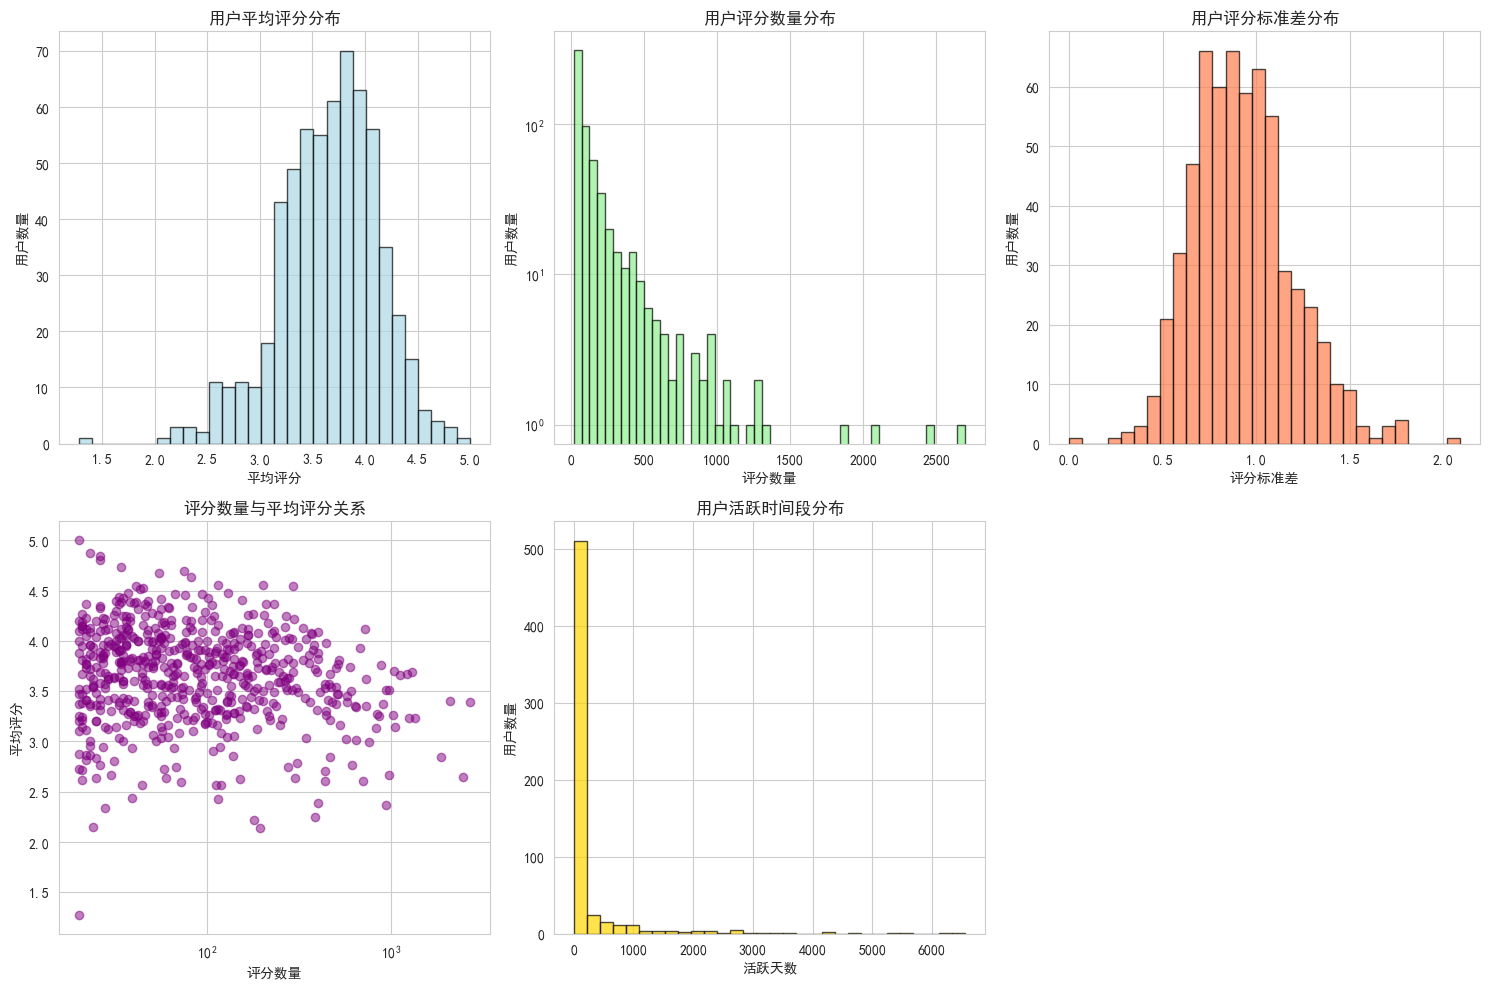

In [7]:
# 6. 用户行为分析
def analyze_user_behavior(ratings):
    # 分析用户评分行为
    user_stats = ratings.groupby('userId').agg({'rating': ['mean', 'std', 'count'],
                                                 'movieId': 'nunique', 'timestamp': ['min', 'max']}).round(3)
    user_stats.columns = ['avg_rating', 'rating_std', 'rating_count', 'unique_movies', 'first_rating', 'last_rating']
    user_stats['rating_period'] = (user_stats['last_rating'] - user_stats['first_rating']) / (24 * 3600)
    
    print("用户行为统计:")
    print(user_stats.describe())
    
    plt.figure(figsize=(15, 10))
    
    # 用户平均评分分布
    plt.subplot(2, 3, 1)
    user_stats['avg_rating'].hist(bins=30, alpha=0.7, color='lightblue', edgecolor='black')
    plt.title('用户平均评分分布')
    plt.xlabel('平均评分')
    plt.ylabel('用户数量')
    
    # 用户评分数量分布
    plt.subplot(2, 3, 2)
    user_stats['rating_count'].hist(bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
    plt.title('用户评分数量分布')
    plt.xlabel('评分数量')
    plt.ylabel('用户数量')
    plt.yscale('log')
    
    # 用户评分标准差分布
    plt.subplot(2, 3, 3)
    user_stats['rating_std'].hist(bins=30, alpha=0.7, color='coral', edgecolor='black')
    plt.title('用户评分标准差分布')
    plt.xlabel('评分标准差')
    plt.ylabel('用户数量')
    
    # 平均评分与评分数量的关系
    plt.subplot(2, 3, 4)
    plt.scatter(user_stats['rating_count'], user_stats['avg_rating'], alpha=0.5, color='purple')
    plt.title('评分数量与平均评分关系')
    plt.xlabel('评分数量')
    plt.ylabel('平均评分')
    plt.xscale('log')
    
    # 用户活跃时间段
    plt.subplot(2, 3, 5)
    user_stats['rating_period'].hist(bins=30, alpha=0.7, color='gold', edgecolor='black')
    plt.title('用户活跃时间段分布')
    plt.xlabel('活跃天数')
    plt.ylabel('用户数量')
    
    plt.tight_layout()
    plt.show()
    
    return user_stats

user_stats = analyze_user_behavior(ratings)

In [8]:
# 7. 数据质量检查
def check_data_quality(movies, ratings, links, tags):
    # 检查数据质量问题
    print("数据质量检查:")
    # 检查缺失值
    print("\n缺失值统计:")
    for name, df in [('movies', movies), ('ratings', ratings), ('links', links), ('tags', tags)]:
        missing = df.isnull().sum()
        total = len(df)
        print(f"{name}: {missing.sum()}/{total} ({missing.sum()/total*100:.2f}%)")
        if missing.sum() > 0:
            for col, count in missing[missing > 0].items():
                print(f"  - {col}: {count} ({count/total*100:.2f}%)")
    
    # 检查重复值
    print("\n重复值统计:")
    for name, df in [('movies', movies), ('ratings', ratings), ('links', links), ('tags', tags)]:
        # 对于movies数据框，排除包含列表的列
        if name == 'movies':
            # 选择数值型和字符串型的列
            numeric_cols = df.select_dtypes(include=[np.number, 'object']).columns
            # 确保不包含列表类型的列
            safe_cols = [col for col in numeric_cols if not any(isinstance(x, list) for x in df[col].head())]
            duplicates = df[safe_cols].duplicated().sum()
        else:
            duplicates = df.duplicated().sum()
        
        print(f"{name}: {duplicates} 重复行")
    
    # 检查ID一致性
    print("\nID一致性检查:")
    common_movies = set(movies['movieId']).intersection(set(ratings['movieId']))
    print(f"在movies和ratings中共同出现的电影数: {len(common_movies)}")
    print(f"只在movies中出现的电影数: {len(set(movies['movieId']) - common_movies)}")
    print(f"只在ratings中出现的电影数: {len(set(ratings['movieId']) - common_movies)}")

check_data_quality(movies, ratings, links, tags)

数据质量检查:

缺失值统计:
movies: 13/9742 (0.13%)
  - year: 13 (0.13%)
ratings: 0/100836 (0.00%)
links: 8/9742 (0.08%)
  - tmdbId: 8 (0.08%)
tags: 0/3683 (0.00%)

重复值统计:
movies: 0 重复行
ratings: 0 重复行
links: 0 重复行
tags: 0 重复行

ID一致性检查:
在movies和ratings中共同出现的电影数: 9724
只在movies中出现的电影数: 18
只在ratings中出现的电影数: 0


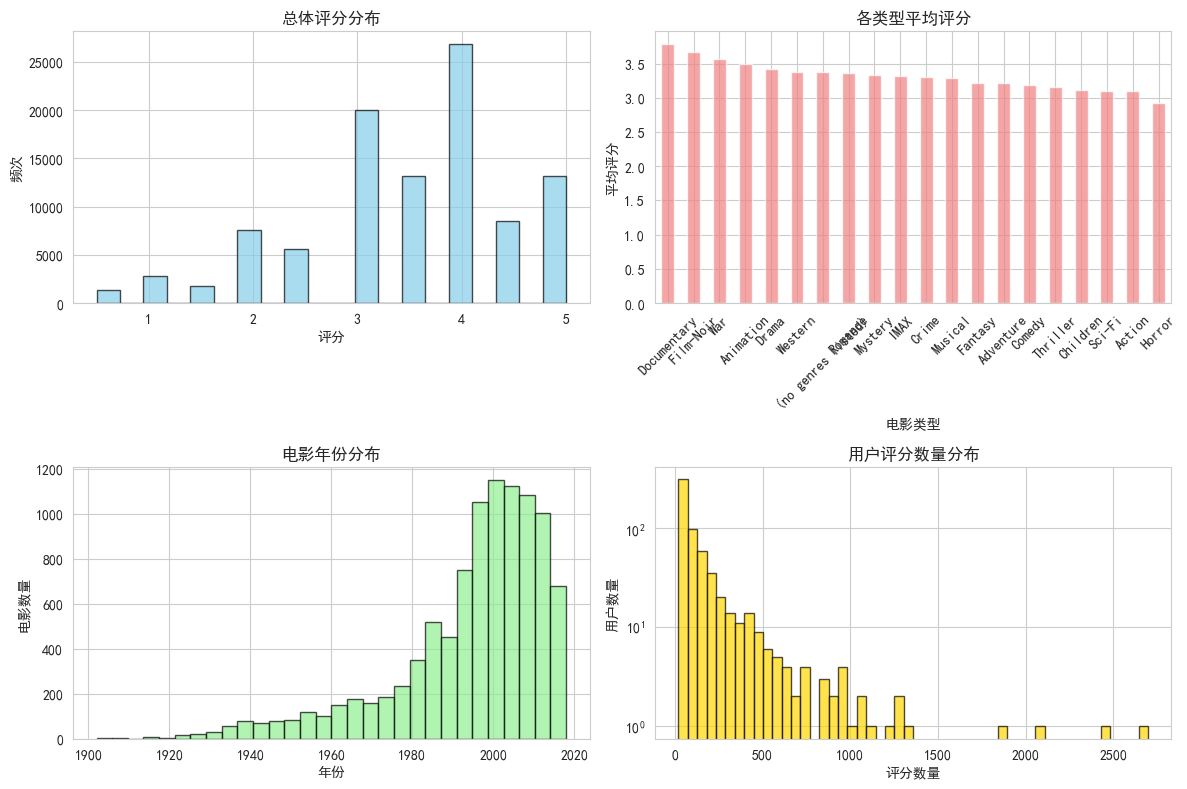

数据探索完成! 结果已保存到 results/figures/


In [9]:
# 8. 保存探索结果
def save_exploration_results(movies, ratings, genre_stats, user_stats):
    # 保存探索结果    
    # 创建结果目录
    results_dir = os.path.join(PROJECT_PATH, "results/figures")
    os.makedirs(results_dir, exist_ok=True)
    # 保存关键图表
    plt.figure(figsize=(12, 8))
    
    # 综合评分分布图
    plt.subplot(2, 2, 1)
    ratings['rating'].hist(bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    plt.title('总体评分分布')
    plt.xlabel('评分')
    plt.ylabel('频次')
    
    plt.subplot(2, 2, 2)
    genre_stats['mean'].plot(kind='bar', color='lightcoral', alpha=0.7)
    plt.title('各类型平均评分')
    plt.xlabel('电影类型')
    plt.ylabel('平均评分')
    plt.xticks(rotation=45)
    
    plt.subplot(2, 2, 3)
    movies['year'].hist(bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
    plt.title('电影年份分布')
    plt.xlabel('年份')
    plt.ylabel('电影数量')
    
    plt.subplot(2, 2, 4)
    user_stats['rating_count'].hist(bins=50, alpha=0.7, color='gold', edgecolor='black')
    plt.title('用户评分数量分布')
    plt.xlabel('评分数量')
    plt.ylabel('用户数量')
    plt.yscale('log')
    
    plt.tight_layout()
    plt.savefig(os.path.join(results_dir, 'data_exploration_summary.png'), dpi=300, bbox_inches='tight')
    plt.show()
    
    print("数据探索完成! 结果已保存到 results/figures/")

save_exploration_results(movies, ratings, genre_stats, user_stats)